# By Kmeans Algorithm

In [1]:
# import hierarchical clustering libraries\n",
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
whole_sale = pd.read_csv("C:\\Users\\CHANDU\\Downloads\\Wholesale customers data.csv")
whole_sale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(whole_sale.iloc[:,2:])
df_norm

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [6]:
kmeans_clust=KMeans(n_clusters=3)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [7]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster \n",
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

In [8]:
TWSS

[array([66.66559691]),
 array([59.30661525]),
 array([52.56791929]),
 array([50.61051451]),
 array([47.1623651]),
 array([44.4606766])]

([<matplotlib.axis.XTick at 0x2898e657fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

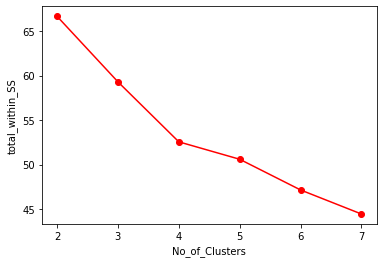

In [9]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

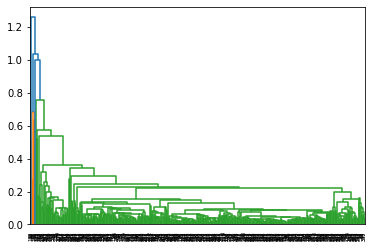

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [11]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [12]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters

,Clusters
0,3
1,3
2,3
3,3
4,3
...,...
435,3
436,3
437,3
438,3


In [14]:
whole_sale['h_clusterid'] = hc.labels_

In [15]:
whole_sale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,h_clusterid
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,3
436,1,3,39228,1431,764,4510,93,2346,3
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,3


In [16]:
result=whole_sale.groupby('h_clusterid').agg(['mean']).reset_index()

In [17]:
result=whole_sale.iloc[:,2:].groupby(whole_sale.h_clusterid).mean()

In [18]:
result

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,h_clusterid
h_clusterid,,,,,,,
0,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,0.0
1,59575.333333,10148.166667,10408.833333,25980.166667,1550.000000,3779.833333,1.0
2,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,2.0
3,11173.009456,4960.834515,6928.061466,2668.295508,2386.680851,1349.628842,3.0
